# FastAI Transfer Learning: Vision

Note: This notebook is intended for Google colab. Change the Colab runtime to GPU or TPU.

## Load Libraries and Data

In [ ]:
# Install fastai
!pip install fastai --upgrade;

In [2]:
# Load libraries
import pathlib
import urllib
import zipfile
import numpy as np
import pandas as pd
from fastai.vision.all import *

import warnings
warnings.filterwarnings('ignore')

# Make this notebook's output stable across runs
set_seed(1000)

In [3]:
extract_dir = './Data'
pathlib.Path(extract_dir).mkdir(parents=True, exist_ok=True)
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/Weather.zip'

zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, 'r') as f:
    f.extractall(extract_dir)

In [4]:
# Get image files in data folder
files = get_image_files('./Data/Weather')
len(files)

872

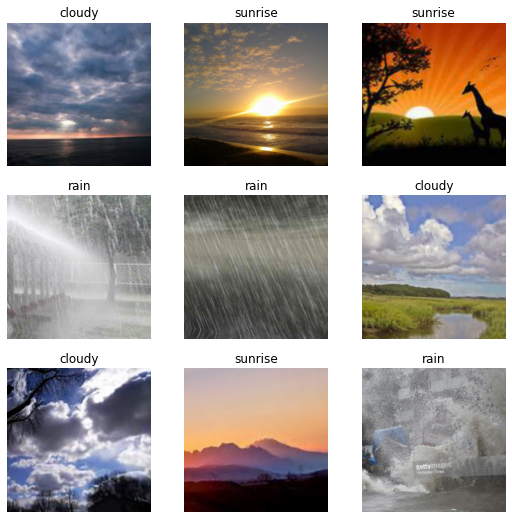

In [5]:
# Create data loaders
pattern = r'^([^\d]*)'

dls = ImageDataLoaders.from_name_re('data', files, pattern,
                                    item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))
dls.show_batch()

## Fine Tune a Pre-Trained Model, Resnet34

In [6]:
# Resnet34 is a 34-layer convolutional neural network pretrained on ImageNet
# Image input size is 224x224x3
# Parameters roughly 20M
learn = cnn_learner(dls, resnet34, metrics=accuracy)

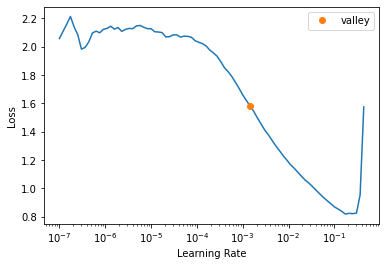

In [7]:
# Assess potential learning rates
lr = learn.lr_find()

In [8]:
lr.valley

0.0014454397605732083

In [9]:
# Fine tune using the suggested learning rate
learn.fine_tune(1, lr.valley)

epoch,train_loss,valid_loss,accuracy,time
0,1.384645,0.122076,0.959770,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.192105,0.027618,0.988506,00:12


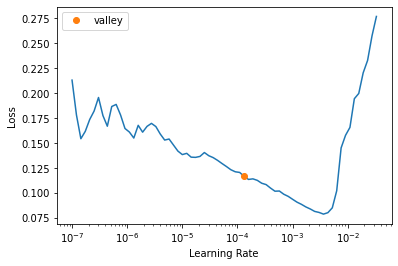

In [10]:
lr = learn.lr_find()

In [11]:
# Fine tune with the revised learning rate
learn.fine_tune(1, lr.valley)

epoch,train_loss,valid_loss,accuracy,time
0,0.112164,0.028542,0.988506,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.152378,0.029457,0.988506,00:13


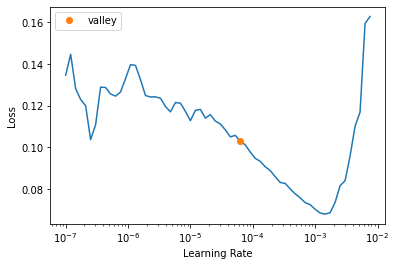

In [12]:
lr = learn.lr_find()

In [13]:
# Fine tune with the revised learning rate
learn.fine_tune(1, lr.valley)

epoch,train_loss,valid_loss,accuracy,time
0,0.150768,0.026329,0.988506,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.080243,0.025581,0.988506,00:13


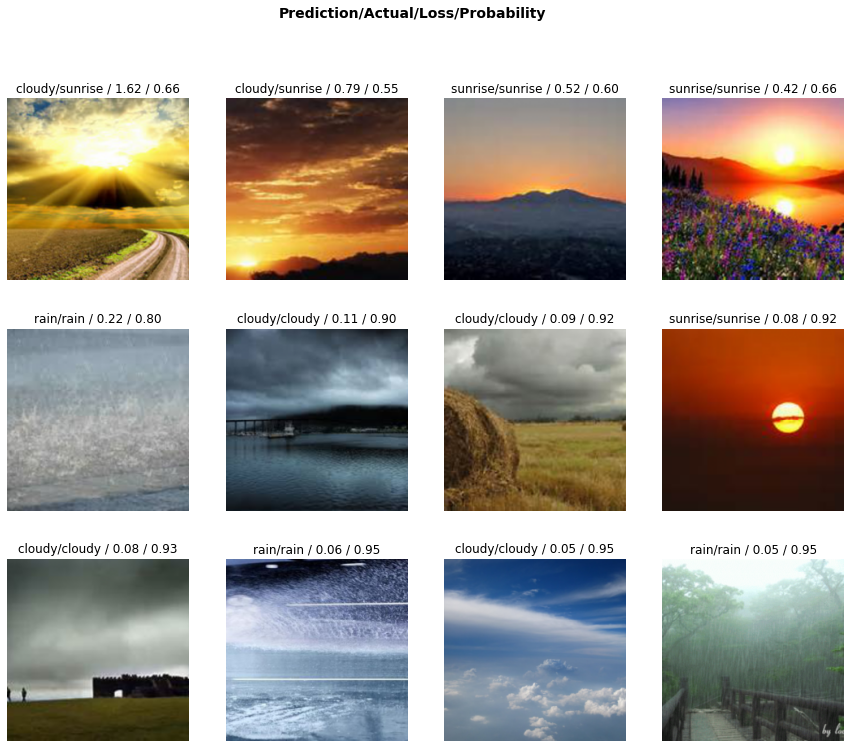

In [14]:
# Show misses
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(12, figsize=(15,12))